# Python Code for IMDB Dataset Study #

## Loading Modules and Dataset ##

In [76]:
#importing all relevant modules
import os
import pandas as pd
import numpy as np
import seaborn as sns
import statsmodels.formula.api as smf
from matplotlib import pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import  RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_absolute_error, accuracy_score, precision_score, f1_score, recall_score

In [45]:
#loading the data
movie_data_loc = os.path.join(os.getcwd(), 'IMDB-Movie-Data.csv')
movie_data = pd.read_csv(movie_data_loc)
movie_data.head()

,Rank,Title,Genre,Description,Director,Actors,Year,Runtime (Minutes),Rating,Votes,Revenue (Millions),Metascore
0,1,Guardians of the Galaxy,"Action,Adventure,Sci-Fi",A group of intergalactic criminals are forced ...,James Gunn,"Chris Pratt, Vin Diesel, Bradley Cooper, Zoe S...",2014,121,8.1,757074,333.13,76.0
1,2,Prometheus,"Adventure,Mystery,Sci-Fi","Following clues to the origin of mankind, a te...",Ridley Scott,"Noomi Rapace, Logan Marshall-Green, Michael Fa...",2012,124,7.0,485820,126.46,65.0
2,3,Split,"Horror,Thriller",Three girls are kidnapped by a man with a diag...,M. Night Shyamalan,"James McAvoy, Anya Taylor-Joy, Haley Lu Richar...",2016,117,7.3,157606,138.12,62.0
3,4,Sing,"Animation,Comedy,Family","In a city of humanoid animals, a hustling thea...",Christophe Lourdelet,"Matthew McConaughey,Reese Witherspoon, Seth Ma...",2016,108,7.2,60545,270.32,59.0
4,5,Suicide Squad,"Action,Adventure,Fantasy",A secret government agency recruits some of th...,David Ayer,"Will Smith, Jared Leto, Margot Robbie, Viola D...",2016,123,6.2,393727,325.02,40.0


In [46]:
#retrieving information on the dataset
movie_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Rank                1000 non-null   int64  
 1   Title               1000 non-null   object 
 2   Genre               1000 non-null   object 
 3   Description         1000 non-null   object 
 4   Director            1000 non-null   object 
 5   Actors              1000 non-null   object 
 6   Year                1000 non-null   int64  
 7   Runtime (Minutes)   1000 non-null   int64  
 8   Rating              1000 non-null   float64
 9   Votes               1000 non-null   int64  
 10  Revenue (Millions)  872 non-null    float64
 11  Metascore           936 non-null    float64
dtypes: float64(3), int64(4), object(5)
memory usage: 93.9+ KB


In [47]:
movie_data_new_loc = os.path.join(os.getcwd(), 'movies_metadata.csv')
movie_data_new = pd.read_csv(movie_data_new_loc)
movie_data_new.info()

C:\Users\dorna\AppData\Local\Temp\ipykernel_20828\277915560.py:2: DtypeWarning: Columns (10) have mixed types. Specify dtype option on import or set low_memory=False.
  movie_data_new = pd.read_csv(movie_data_new_loc)


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45466 entries, 0 to 45465
Data columns (total 24 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   adult                  45466 non-null  object 
 1   belongs_to_collection  4494 non-null   object 
 2   budget                 45466 non-null  object 
 3   genres                 45466 non-null  object 
 4   homepage               7782 non-null   object 
 5   id                     45466 non-null  object 
 6   imdb_id                45449 non-null  object 
 7   original_language      45455 non-null  object 
 8   original_title         45466 non-null  object 
 9   overview               44512 non-null  object 
 10  popularity             45461 non-null  object 
 11  poster_path            45080 non-null  object 
 12  production_companies   45463 non-null  object 
 13  production_countries   45463 non-null  object 
 14  release_date           45379 non-null  object 
 15  re

In [48]:
movie_data.describe()

,Rank,Year,Runtime (Minutes),Rating,Votes,Revenue (Millions),Metascore
count,1000.000000,1000.000000,1000.000000,1000.000000,1.000000e+03,872.000000,936.000000
mean,500.500000,2012.783000,113.172000,6.723200,1.698083e+05,82.956376,58.985043
std,288.819436,3.205962,18.810908,0.945429,1.887626e+05,103.253540,17.194757
min,1.000000,2006.000000,66.000000,1.900000,6.100000e+01,0.000000,11.000000
25%,250.750000,2010.000000,100.000000,6.200000,3.630900e+04,13.270000,47.000000
50%,500.500000,2014.000000,111.000000,6.800000,1.107990e+05,47.985000,59.500000
75%,750.250000,2016.000000,123.000000,7.400000,2.399098e+05,113.715000,72.000000
max,1000.000000,2016.000000,191.000000,9.000000,1.791916e+06,936.630000,100.000000


## Cleaning the data and preparing it for statistical analysis ##

#### Dropping null values and checking the dataset ####

In [49]:
movie_data = movie_data.dropna()
movie_data.isna().sum()
movie_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 838 entries, 0 to 999
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Rank                838 non-null    int64  
 1   Title               838 non-null    object 
 2   Genre               838 non-null    object 
 3   Description         838 non-null    object 
 4   Director            838 non-null    object 
 5   Actors              838 non-null    object 
 6   Year                838 non-null    int64  
 7   Runtime (Minutes)   838 non-null    int64  
 8   Rating              838 non-null    float64
 9   Votes               838 non-null    int64  
 10  Revenue (Millions)  838 non-null    float64
 11  Metascore           838 non-null    float64
dtypes: float64(3), int64(4), object(5)
memory usage: 85.1+ KB


#### Dropping description from the dataframe:

In [50]:
movie_data.drop(['Description'], axis=1, inplace=True)
movie_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 838 entries, 0 to 999
Data columns (total 11 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Rank                838 non-null    int64  
 1   Title               838 non-null    object 
 2   Genre               838 non-null    object 
 3   Director            838 non-null    object 
 4   Actors              838 non-null    object 
 5   Year                838 non-null    int64  
 6   Runtime (Minutes)   838 non-null    int64  
 7   Rating              838 non-null    float64
 8   Votes               838 non-null    int64  
 9   Revenue (Millions)  838 non-null    float64
 10  Metascore           838 non-null    float64
dtypes: float64(3), int64(4), object(4)
memory usage: 78.6+ KB


#### Merging new dataset with orginal one

In [51]:
to_merge = movie_data_new[['budget','title']]
to_merge = to_merge.rename(columns={'budget': 'Budget','title': 'Title'})
to_merge.dropna(inplace=True)
to_merge.drop_duplicates(subset=['Title'],keep='first', inplace=True)
to_merge = to_merge[to_merge.Budget != 0]
to_merge.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 42277 entries, 0 to 45465
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Budget  42277 non-null  object
 1   Title   42277 non-null  object
dtypes: object(2)
memory usage: 990.9+ KB


In [52]:
final_movies = pd.merge(movie_data, to_merge, on='Title', how='inner')
final_movies['Budget']= pd.to_numeric(final_movies['Budget'],errors = 'coerce')
final_movies['Budget'] = (final_movies['Budget'].apply(lambda x: x / 1000000 )).round(2)
final_movies.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 797 entries, 0 to 796
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Rank                797 non-null    int64  
 1   Title               797 non-null    object 
 2   Genre               797 non-null    object 
 3   Director            797 non-null    object 
 4   Actors              797 non-null    object 
 5   Year                797 non-null    int64  
 6   Runtime (Minutes)   797 non-null    int64  
 7   Rating              797 non-null    float64
 8   Votes               797 non-null    int64  
 9   Revenue (Millions)  797 non-null    float64
 10  Metascore           797 non-null    float64
 11  Budget              797 non-null    float64
dtypes: float64(4), int64(4), object(4)
memory usage: 80.9+ KB


#### Encoding the Genre Column

In [53]:
#taking the first value in the genre column as it's genre
final_movies['Genre'] = final_movies['Genre'].apply(lambda x: x.split(',')[0])
final_movies.head()
#using one-hot encoding to encode the genre column
one_hot_encoded = pd.get_dummies(final_movies['Genre'])
final_movies = pd.concat([final_movies, one_hot_encoded], axis=1)
final_movies.head()

,Rank,Title,Genre,Director,Actors,Year,Runtime (Minutes),Rating,Votes,Revenue (Millions),...,Animation,Biography,Comedy,Crime,Drama,Fantasy,Horror,Mystery,Sci-Fi,Thriller
0,1,Guardians of the Galaxy,Action,James Gunn,"Chris Pratt, Vin Diesel, Bradley Cooper, Zoe S...",2014,121,8.1,757074,333.13,...,0,0,0,0,0,0,0,0,0,0
1,2,Prometheus,Adventure,Ridley Scott,"Noomi Rapace, Logan Marshall-Green, Michael Fa...",2012,124,7.0,485820,126.46,...,0,0,0,0,0,0,0,0,0,0
2,3,Split,Horror,M. Night Shyamalan,"James McAvoy, Anya Taylor-Joy, Haley Lu Richar...",2016,117,7.3,157606,138.12,...,0,0,0,0,0,0,1,0,0,0
3,4,Sing,Animation,Christophe Lourdelet,"Matthew McConaughey,Reese Witherspoon, Seth Ma...",2016,108,7.2,60545,270.32,...,1,0,0,0,0,0,0,0,0,0
4,5,Suicide Squad,Action,David Ayer,"Will Smith, Jared Leto, Margot Robbie, Viola D...",2016,123,6.2,393727,325.02,...,0,0,0,0,0,0,0,0,0,0


## Statistical Analysis

#### Creating Heatmap

<class 'pandas.core.frame.DataFrame'>
Int64Index: 797 entries, 0 to 796
Data columns (total 8 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Rank                797 non-null    int64  
 1   Year                797 non-null    int64  
 2   Runtime (Minutes)   797 non-null    int64  
 3   Rating              797 non-null    float64
 4   Votes               797 non-null    int64  
 5   Revenue (Millions)  797 non-null    float64
 6   Metascore           797 non-null    float64
 7   Budget              797 non-null    float64
dtypes: float64(4), int64(4)
memory usage: 56.0 KB


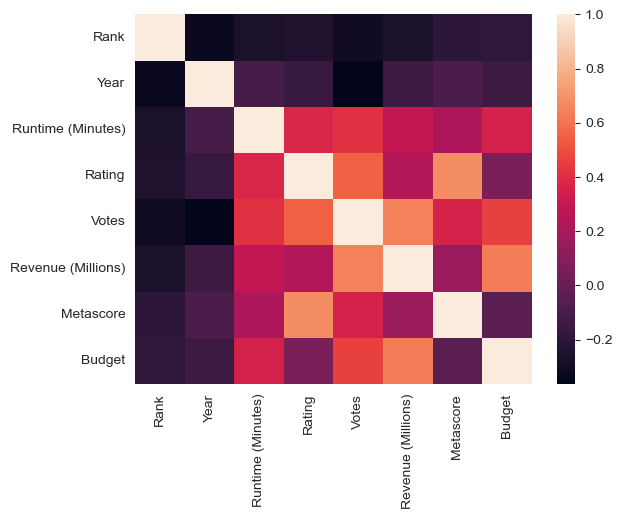

In [54]:
for_heatmap = final_movies[['Rank','Year','Runtime (Minutes)','Rating','Votes','Revenue (Millions)','Metascore','Budget']]
for_heatmap.info()
sns.heatmap(for_heatmap.corr());
sns.set_context(font_scale=0.9)

#### Scatter plot of Metascore vs. Rating

[Text(0.5, 0, 'Metascore (critics rating)'), Text(0, 0.5, 'Public Rating')]

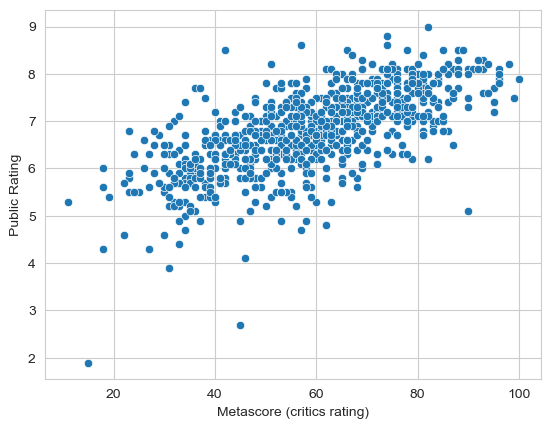

In [55]:
scatter = sns.scatterplot(final_movies, x ='Metascore', y='Rating')
scatter.set(xlabel = 'Metascore (critics rating)', ylabel = 'Public Rating')

#### Scatter plot of Budget vs. Revenue

<Axes: xlabel='Budget', ylabel='Revenue (Millions)'>

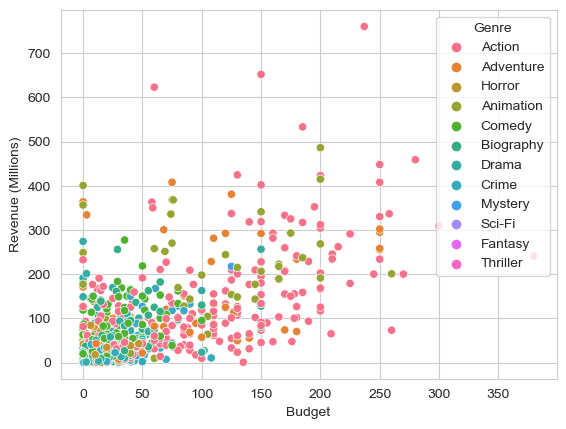

In [56]:
sns.scatterplot(final_movies, x='Budget', y='Revenue (Millions)', hue='Genre')

#### Linear Regression

In [57]:
model = smf.ols('Q("Revenue (Millions)") ~ Budget', data=final_movies)
results = model.fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               OLS Regression Results                              
===================================================================================
Dep. Variable:     Q("Revenue (Millions)")   R-squared:                       0.399
Model:                                 OLS   Adj. R-squared:                  0.398
Method:                      Least Squares   F-statistic:                     528.1
Date:                     Tue, 11 Apr 2023   Prob (F-statistic):           5.21e-90
Time:                             08:16:59   Log-Likelihood:                -4589.9
No. Observations:                      797   AIC:                             9184.
Df Residuals:                          795   BIC:                             9193.
Df Model:                                1                                         
Covariance Type:                 nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     31.0089      3.581      8.660      0.000      23.980      38.037
Budget         1.0036      0.044     22.980      0.000       0.918       1.089
==============================================================================
Omnibus:                      422.101   Durbin-Watson:                   2.060
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             3513.120
Skew:                           2.264   Prob(JB):                         0.00
Kurtosis:                      12.236   Cond. No.                         108.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

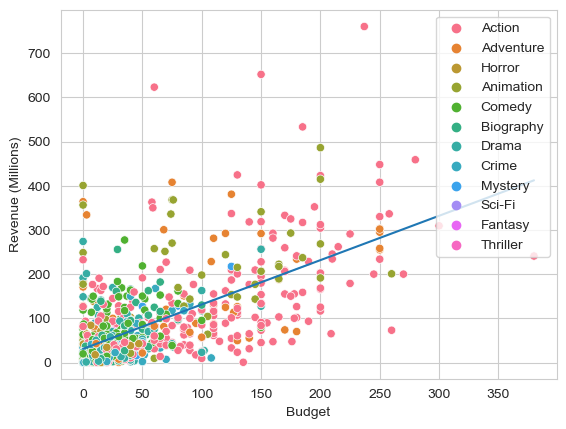

In [58]:
sns.scatterplot(data=final_movies, hue='Genre', y='Revenue (Millions)', x='Budget')
y_hat = results.predict(final_movies['Budget'])
sns.lineplot(x=final_movies['Budget'], y=y_hat)
sns.set_context(font_scale=0.9)

In [59]:
MSE = results.mse_resid
RMSE = np.sqrt(MSE)
print('Mean Squared Error:', MSE)
print('Root Mean Squared Error:', RMSE)

Mean Squared Error: 5898.989139257581
Root Mean Squared Error: 76.80487705385369


#### Random Forest

Random Forest focusing on genre

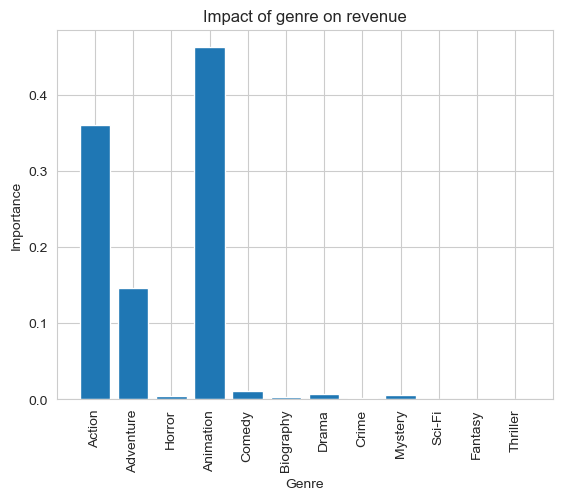

In [60]:
features = ['Action', 'Adventure','Horror','Animation','Comedy','Biography','Drama','Crime','Mystery','Sci-Fi','Fantasy','Thriller']
X_train, X_test, y_train, y_test = train_test_split(final_movies[features],final_movies['Revenue (Millions)'] , test_size=0.2, random_state=42)
rf = RandomForestRegressor(n_estimators=100, random_state=42)
rf.fit(X_train, y_train);
#importances
importances = list(rf.feature_importances_)
feature_importances = [(feature, round(importance, 2)) for feature, importance in zip( features , importances)]
x_values = list(range(len(importances)))
plt.bar(x_values, importances, orientation = 'vertical')
# Tick labels for x axis
plt.xticks(x_values, features, rotation='vertical')
# Axis labels and title
plt.ylabel('Importance'); plt.xlabel('Genre'); plt.title('Impact of genre on revenue');

Random Forest focusing on other features

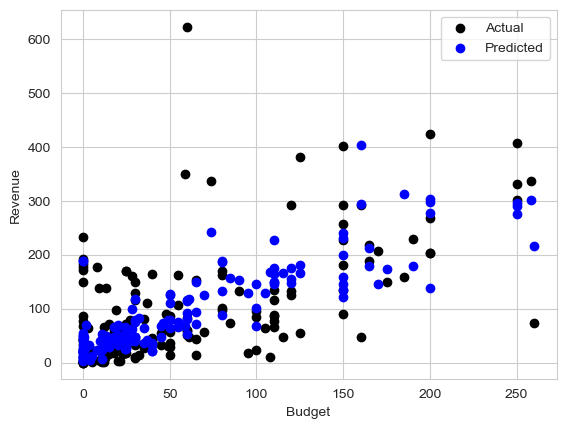

In [78]:
features2 = ['Budget','Runtime (Minutes)']
x_train, x_test, Y_train, Y_test = train_test_split(final_movies[features2],final_movies['Revenue (Millions)'] , test_size=0.2, random_state=42)
rf = RandomForestRegressor(n_estimators=100, random_state=42)
rf.fit(x_train, Y_train)
Y_pred = rf.predict(x_test)
plt.scatter(x_test['Budget'], Y_test, color='black')
plt.scatter(x_test['Budget'], Y_pred, color='blue')
plt.xlabel('Budget')
plt.ylabel('Revenue')
plt.legend(['Actual', 'Predicted'])
plt.show()

In [92]:
#Accuracy and precision for Random Forest
errors = abs(Y_pred - Y_test)
mape = (errors / Y_test)
accuracy = 100 - np.mean(mape)
print('Accuracy:', round(accuracy,2))

Accuracy: 72.73


In [79]:
# Evaluate the model using R-squared and Mean Absolute Error
r2 = r2_score(Y_test, Y_pred)
mae = mean_absolute_error(Y_test, Y_pred)
# Print the evaluation metrics
print('R-squared:', r2)
print('Mean Absolute Error:', mae)

R-squared: 0.2541872322208536
Mean Absolute Error: 59.45167179153138


#### k-NN for prediction

In [63]:
# Data Prep:
final_movies['Revenue Category (Millions)'] = pd.cut(final_movies['Revenue (Millions)'], bins= [-1,14,48,116,940], labels=['<14','14-48','48-116','>116'])
movie_labels = final_movies['Revenue Category (Millions)']
movie_features = final_movies.drop(columns=['Revenue Category (Millions)', 'Title','Director','Actors','Genre','Year','Revenue (Millions)'])

In [64]:
#Standardisation
standardiser = StandardScaler()
movie_features_standardised = standardiser.fit_transform(movie_features)

In [65]:
#Training and testing data
movie_features_standardised_train, movie_features_standardised_test, movie_labels_train, movie_labels_test = train_test_split(movie_features_standardised,movie_labels, test_size=0.2)

In [66]:
knn = KNeighborsClassifier()
knn.fit(movie_features_standardised_train, movie_labels_train)

KNeighborsClassifier()

In [67]:
df = pd.DataFrame({'predicted': knn.predict(movie_features_standardised_test),
                   'actual': movie_labels_test})

In [68]:
#accuracy
print(metrics.accuracy_score(movie_labels_test, knn.predict(movie_features_standardised_test)))
print(metrics.accuracy_score(movie_labels_test, knn.predict(movie_features_standardised_test)))

0.425
0.425


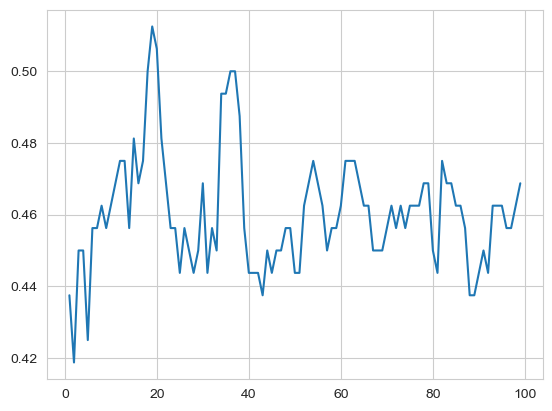

In [73]:
accuracy = []
for k in range(1, 100):
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(movie_features_standardised_train, movie_labels_train)
    movie_predict = knn.predict(movie_features_standardised_test)
    accuracy.append(metrics.accuracy_score(movie_labels_test, movie_predict))
plt.plot(range(1, 100), accuracy)

Text(0, 0.5, 'Cross-validated accuracy')

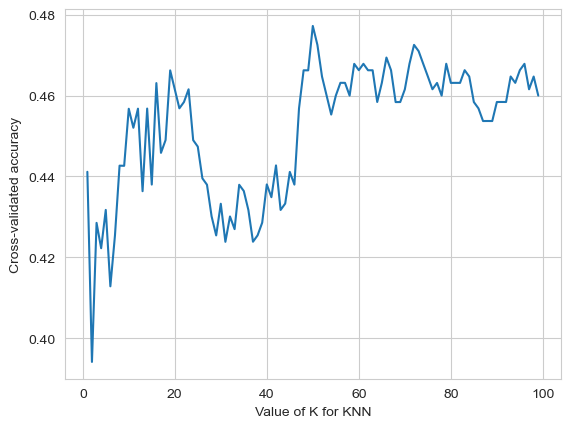

In [74]:
k_range = range(1,100)
k_scores=[]
for k in k_range:
    knn = KNeighborsClassifier(n_neighbors=k)
    accuracy = cross_val_score(knn, movie_features_standardised_train, movie_labels_train, cv=4, scoring='accuracy')
    k_scores.append(accuracy.mean())

plt.plot(k_range, k_scores)
plt.xlabel('Value of K for KNN')
plt.ylabel('Cross-validated accuracy')